In [1]:
# !pip install pmdarima

In [2]:
# Mevsimsellik içermeyen ARIMA Modeli
# ARIMA modeli durağan serilerle çalışır.
# Durağan olmayan seriler fark alınarak durağanlaştırıldığında bu farkın derecesi ARIMA modelinin d parametresi olur.
# Hataların White Noise sürecinde olması gerekir. ( = Otokorelasyon olmamalı)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch.unitroot import ADF, KPSS
from pmdarima import auto_arima

In [4]:
data = pd.read_excel("C:/Users/htcso/Downloads/EVDS (2).xlsx")

In [5]:
data.head()

,Tarih,TP MK LON YTL
0,2000-01,284.3
1,2000-02,300.7
2,2000-03,285.3
3,2000-04,279.4
4,2000-05,275.9


In [6]:
date = pd.date_range(start = "01.01.2000", periods = len(data["Tarih"]), freq = "M")
data["Tarih"] = date
data.set_index("Tarih", inplace = True)
data.head()

,TP MK LON YTL
Tarih,
2000-01-31,284.3
2000-02-29,300.7
2000-03-31,285.3
2000-04-30,279.4
2000-05-31,275.9


In [7]:
data.rename(columns = {"TP MK LON YTL": "Altın Fiyat"},inplace = True)
data.head()

,Altın Fiyat
Tarih,
2000-01-31,284.3
2000-02-29,300.7
2000-03-31,285.3
2000-04-30,279.4
2000-05-31,275.9


In [8]:
data.isnull().sum()

Altın Fiyat    0
dtype: int64

In [9]:
last_12_months = data.iloc[-12:]
data = data.iloc[:-12]

print(data)
print(last_12_months)

            Altın Fiyat
Tarih                  
2000-01-31       284.30
2000-02-29       300.70
2000-03-31       285.30
2000-04-30       279.40
2000-05-31       275.90
...                 ...
2022-05-31      1844.97
2022-06-30      1837.12
2022-07-31      1745.34
2022-08-31      1766.83
2022-09-30      1681.17

[273 rows x 1 columns]
            Altın Fiyat
Tarih                  
2022-10-31      1659.18
2022-11-30      1728.53
2022-12-31      1793.53
2023-01-31      1901.82
2023-02-28      1844.98
2023-03-31      1927.60
2023-04-30      1994.37
2023-05-31      1982.26
2023-06-30      1953.50
2023-07-31      1947.71
2023-08-31      1916.86
2023-09-30      1918.78


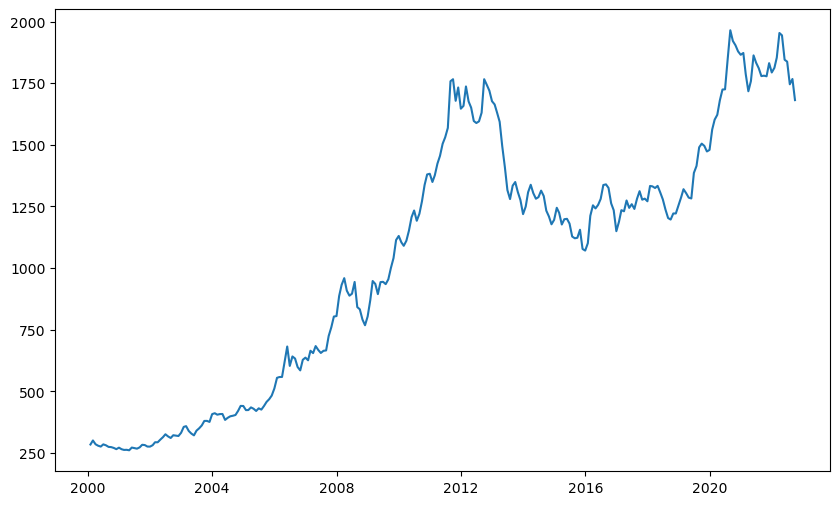

In [10]:
plt.figure(figsize = (10,6))
plt.plot(data)
plt.show()  # artan bir trend mevcut

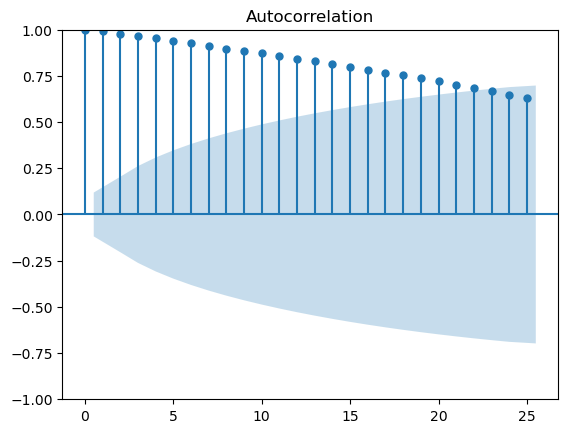

In [11]:
plot_acf(data);  # trend gözlemleniyor, bariz bir mevsimsellik görünmüyor.

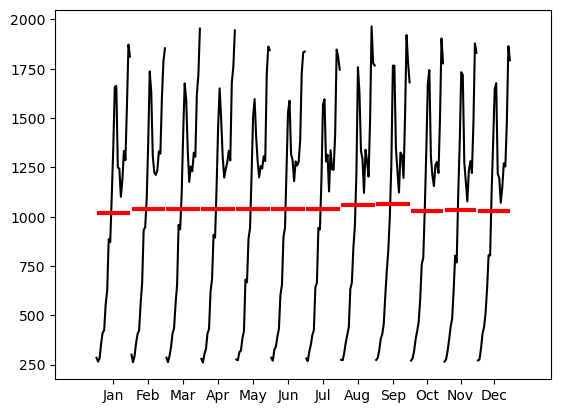

In [12]:
month_plot(data); # net bir mevsimsellik gözlemlenmiyor.

In [13]:
print(ADF(data))
print("\n\n")
print(KPSS(data))

# istatistiksel testlere göre de seri durağan değildir.

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.003
P-value                         0.752
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



    KPSS Stationarity Test Results   
Test Statistic                  2.156
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [14]:
data_diff = data.diff().dropna() # seriyi durağanlaştırmak için birinci fark alma işlemi

print(ADF(data_diff))
print("\n\n")
print(KPSS(data_diff))


   Augmented Dickey-Fuller Results   
Test Statistic                -13.074
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.



    KPSS Stationarity Test Results   
Test Statistic                  0.102
P-value                         0.575
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [15]:
# testlere göre seri durağan hale gelmiştir.
# Seri ilk fark alma işleminde durağan hale geldiğine göre ARIMA modelinin d parametresi 1'dir.

In [16]:
model = auto_arima(data, trace = True, seasonal = False, d=1)
print(model)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2787.590, Time=1.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2797.542, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2787.065, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2786.253, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2799.754, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2788.252, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2788.252, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2790.241, Time=0.94 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2787.103, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 5.034 seconds
 ARIMA(0,1,1)(0,0,0)[0] intercept


In [17]:
#model = auto_arima(data, trace = True, seasonal = False, information_criterion = "bic", d=1)
#print(model)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  273
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1390.126
Date:                Mon, 12 Feb 2024   AIC                           2786.253
Time:                        12:14:01   BIC                           2797.070
Sample:                    01-31-2000   HQIC                          2790.595
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.0651      3.073      1.649      0.099      -0.957      11.087
ma.L1          0.2263      0.054      4.153      0.000       0.119       0.333
sigma2      1609.1410     99.918     16.105      0.000    1413.305    1804.977
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                41.81
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.70   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# Güven aralığını %10 kabul edersek katsayılar istatistiksel olarak anlamlıdır.

In [20]:
err = model.resid()
err

Tarih
2000-01-31    279.234875
2000-02-29     11.233373
2000-03-31    -22.883380
2000-04-30     -5.799958
2000-05-31     -7.252883
                 ...    
2022-05-31    -96.202878
2022-06-30      8.853569
2022-07-31    -98.848502
2022-08-31     38.792218
2022-09-30    -99.502990
Length: 273, dtype: float64

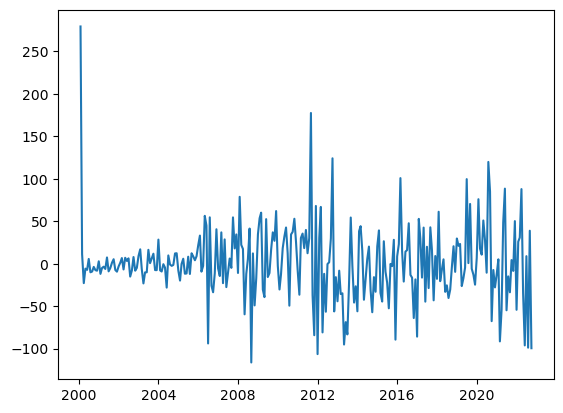

In [21]:
plt.plot(err); # grafiğe göre hatalar white noise içeriyor.

In [22]:
# hataların otokorelasyon testi
print(acorr_ljungbox(err))

# prob değerleri > 0.05 olduğundan otokorelasyon istatistiksel olarak anlamsızdır.
# white noise göstergesi

     lb_stat  lb_pvalue
1   0.010847   0.917051
2   0.095206   0.953512
3   0.316928   0.956814
4   0.415838   0.981160
5   2.795466   0.731483
6   3.637408   0.725607
7   4.029648   0.776356
8   7.795747   0.453672
9   7.818438   0.552542
10  8.040982   0.624834


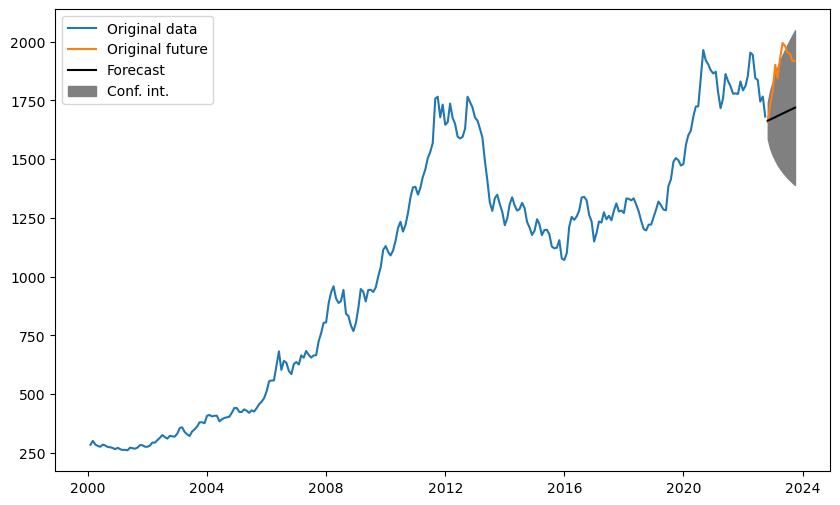

In [23]:
forecast, conf_int = model.predict(12, return_conf_int = True)

plt.figure(figsize = (10,6))
plt.plot(data, label = "Original data")
plt.plot(last_12_months, label = "Original future")
plt.plot(forecast, label = "Forecast", color = "black")
plt.fill_between(forecast.index, conf_int[:,0], conf_int[:,1], color = "gray", label = "Conf. int.")
plt.legend();